<a href="https://colab.research.google.com/github/Divyansh-1210/Crime-Article-Recommendation/blob/main/crime_articles_recommendation_system_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
import string,time
import ast
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from nltk.tokenize import word_tokenize,sent_tokenize
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [89]:
#Creating a dataframe
df=pd.read_csv("7k  Unique crime articles.csv")
df

,heading,content_summary,article_link,img_link,month_date,time,Year
0,"Uttarakhand: Man, 39, held for killing consta...",Nainital district police on Monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,09:55,2022
1,"Nashik city: Another theft from parked car, s...",Thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,08:25,2022
2,Pune: Externed criminal jumps from bus fearin...,An externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,05:17,2022
3,Gaya woman burned alive on suspicion of witch...,A middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/patna...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 06,05:24,2022
4,Man held on charge of stalking in Pune,A man (33) was arrested on Tuesday from Khed ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 03,08:32,2022
...,...,...,...,...,...,...,...
7612,Mumbai: Borivli businessman duped of Rs 1 lak...,A smalltime businessman from Borivli was dupe...,https://timesofindia.indiatimes.com/city/mumba...,https://static.toiimg.com/thumb/imgsize-123456...,Jul 11,14:44,2020
7613,Former New York governor Cuomo accused of gro...,The filing from the Albany County Sheriff's O...,https://timesofindia.indiatimes.com/world/us/f...,https://static.toiimg.com/thumb/imgsize-123456...,Oct 29,"21, 0","29,"
7614,Delhi cop and neighbour injured in shooting; ...,A policeman and his neighbour were shot at by...,https://timesofindia.indiatimes.com/city/delhi...,https://static.toiimg.com/thumb/imgsize-123456...,Oct 06,10:32,2020
7615,Illegal granite mining in TN: ED tags assets ...,The Enforcement directorate (ED) has told the...,https://timesofindia.indiatimes.com/city/chenn...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 10,04:39,2020


In [22]:
#shape of the dataframe

df.shape

(7617, 7)

In [23]:
df.head()

,heading,content_summary,article_link,img_link,month_date,time,Year
0,"Uttarakhand: Man, 39, held for killing consta...",Nainital district police on Monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,09:55,2022
1,"Nashik city: Another theft from parked car, s...",Thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,08:25,2022
2,Pune: Externed criminal jumps from bus fearin...,An externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,05:17,2022
3,Gaya woman burned alive on suspicion of witch...,A middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/patna...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 06,05:24,2022
4,Man held on charge of stalking in Pune,A man (33) was arrested on Tuesday from Khed ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 03,08:32,2022


In [24]:
df.tail()

,heading,content_summary,article_link,img_link,month_date,time,Year
7612,Mumbai: Borivli businessman duped of Rs 1 lak...,A smalltime businessman from Borivli was dupe...,https://timesofindia.indiatimes.com/city/mumba...,https://static.toiimg.com/thumb/imgsize-123456...,Jul 11,14:44,2020
7613,Former New York governor Cuomo accused of gro...,The filing from the Albany County Sheriff's O...,https://timesofindia.indiatimes.com/world/us/f...,https://static.toiimg.com/thumb/imgsize-123456...,Oct 29,"21, 0","29,"
7614,Delhi cop and neighbour injured in shooting; ...,A policeman and his neighbour were shot at by...,https://timesofindia.indiatimes.com/city/delhi...,https://static.toiimg.com/thumb/imgsize-123456...,Oct 06,10:32,2020
7615,Illegal granite mining in TN: ED tags assets ...,The Enforcement directorate (ED) has told the...,https://timesofindia.indiatimes.com/city/chenn...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 10,04:39,2020
7616,Pramod Sawant asks Goa police to ‘zero down’ ...,Chief minister Pramod Sawant on Friday held a...,https://timesofindia.indiatimes.com/city/goa/c...,https://static.toiimg.com/thumb/imgsize-123456...,Oct 24,04:27,2020


In [25]:
# getting information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   heading          7617 non-null   object
 1   content_summary  7617 non-null   object
 2   article_link     7617 non-null   object
 3   img_link         7617 non-null   object
 4   month_date       7617 non-null   object
 5   time             7617 non-null   object
 6   Year             7617 non-null   object
dtypes: object(7)
memory usage: 416.7+ KB


**Handling Null Values**

In [26]:
df.isnull().sum()

,0
heading,0
content_summary,0
article_link,0
img_link,0
month_date,0
time,0
Year,0


****

**So there is no null values in the data Frame**

### Making some plot to UnderStand Our Dataset

In [27]:
#Creating some column to know the words  distribution

df["heading_len"]=df["heading"].apply(lambda x:len(x))

#Counting words
df["word_count"]=df["heading"].apply(lambda x:(len(x.split())))


In [28]:
# Function for getting average word lenghth

def get_avg_word_len(x):

    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len +len(word)
    return word_len/len(words)

In [29]:
df["avg_word_len"]=df["heading"].apply(lambda x: get_avg_word_len(x))

In [30]:
df.head()

,heading,content_summary,article_link,img_link,month_date,time,Year,heading_len,word_count,avg_word_len
0,"Uttarakhand: Man, 39, held for killing consta...",Nainital district police on Monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,09:55,2022,69,10,5.800000
1,"Nashik city: Another theft from parked car, s...",Thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,08:25,2022,68,12,4.583333
2,Pune: Externed criminal jumps from bus fearin...,An externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,05:17,2022,72,12,4.916667
3,Gaya woman burned alive on suspicion of witch...,A middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/patna...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 06,05:24,2022,52,8,5.375000
4,Man held on charge of stalking in Pune,A man (33) was arrested on Tuesday from Khed ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 03,08:32,2022,40,8,3.875000


## making some plots to know our dataset

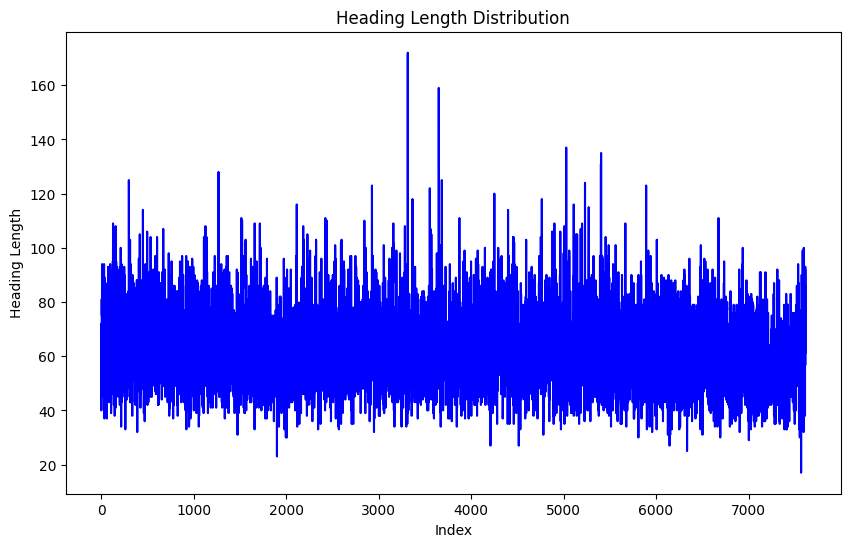

In [53]:


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['heading_len'], color='blue')
plt.xlabel('Index')
plt.ylabel('Heading Length')
plt.title('Heading Length Distribution')
plt.show()

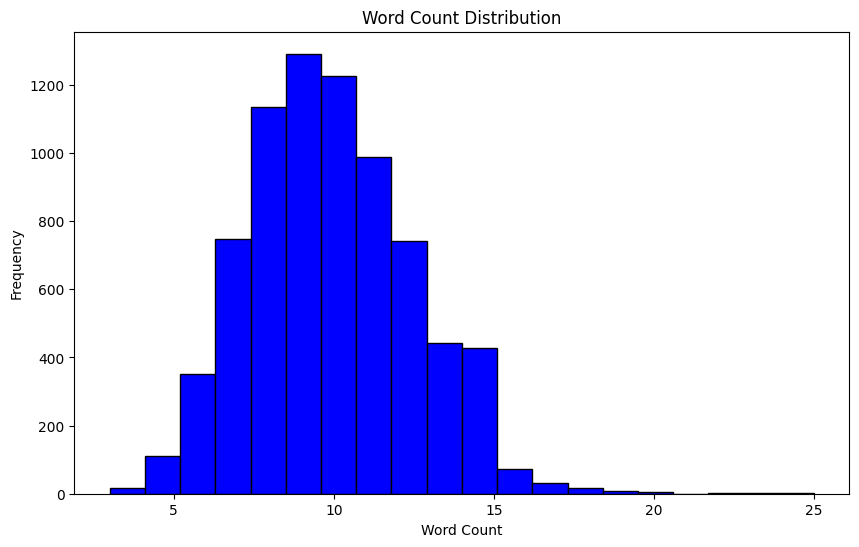

In [52]:
#  Visualizing our word_count column



plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()

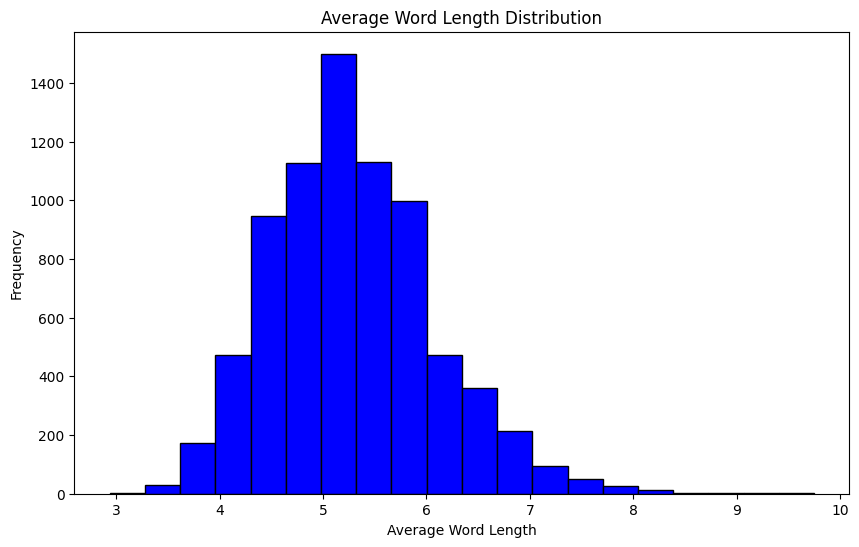

In [51]:
#Visualizing average word length



plt.figure(figsize=(10, 6))
plt.hist(df['avg_word_len'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Average Word Length Distribution')
plt.show()

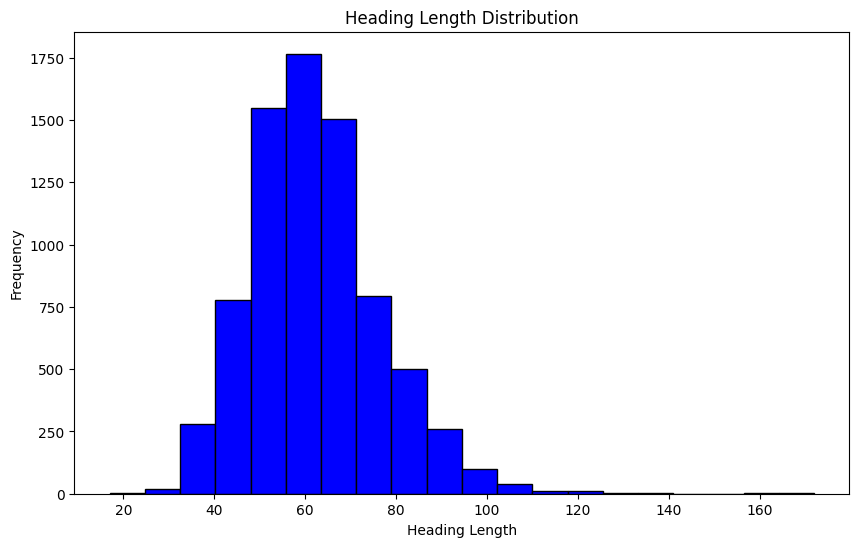

In [56]:
# Visualizing length of heading distribution

plt.figure(figsize=(10, 6))
plt.hist(df['heading_len'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Heading Length')
plt.ylabel('Frequency')
plt.title('Heading Length Distribution')
plt.show()

**Some  Preprocessing steps**

In [57]:
 # converting heading column to lower case

df["heading"].str.lower()

,heading
0,"uttarakhand: man, 39, held for killing consta..."
1,"nashik city: another theft from parked car, s..."
2,pune: externed criminal jumps from bus fearin...
3,gaya woman burned alive on suspicion of witch...
4,man held on charge of stalking in pune
...,...
7612,mumbai: borivli businessman duped of rs 1 lak...
7613,former new york governor cuomo accused of gro...
7614,delhi cop and neighbour injured in shooting; ...
7615,illegal granite mining in tn: ed tags assets ...


In [58]:
#converting heading column to lower case

df["content_summary"].str.lower()

,content_summary
0,nainital district police on monday arrested a...
1,thefts from parked cars continues in the city...
2,an externed criminal died in the early hours ...
3,a middle-aged woman was badly thrashed and bu...
4,a man (33) was arrested on tuesday from khed ...
...,...
7612,a smalltime businessman from borivli was dupe...
7613,the filing from the albany county sheriff's o...
7614,a policeman and his neighbour were shot at by...
7615,the enforcement directorate (ed) has told the...


In [59]:
#Tag Removing Function (for safety purpose)

def remove_tags(text):
    pattern=re.compile("<.-*?>")
    return pattern.sub(r'',text)

In [60]:
#Tag Removal operation

df['heading']=df['heading'].apply(remove_tags)

df["content_summary"]=df["content_summary"].apply(remove_tags)

df["heading"]

,heading
0,"Uttarakhand: Man, 39, held for killing consta..."
1,"Nashik city: Another theft from parked car, s..."
2,Pune: Externed criminal jumps from bus fearin...
3,Gaya woman burned alive on suspicion of witch...
4,Man held on charge of stalking in Pune
...,...
7612,Mumbai: Borivli businessman duped of Rs 1 lak...
7613,Former New York governor Cuomo accused of gro...
7614,Delhi cop and neighbour injured in shooting; ...
7615,Illegal granite mining in TN: ED tags assets ...


**Removing Punctuation**

In [61]:
#Getting all the punctuation
punctuation=string.punctuation

In [62]:
# Implementing String Removing
def remove_punc(text):

    return  text.translate(str.maketrans('','',punctuation))

In [63]:
df['heading']=df['heading'].apply(remove_punc)

df["content_summary"]=df["content_summary"].apply(remove_punc)

In [64]:
df["heading"]

,heading
0,Uttarakhand Man 39 held for killing constable...
1,Nashik city Another theft from parked car sev...
2,Pune Externed criminal jumps from bus fearing...
3,Gaya woman burned alive on suspicion of witch...
4,Man held on charge of stalking in Pune
...,...
7612,Mumbai Borivli businessman duped of Rs 1 lakh...
7613,Former New York governor Cuomo accused of gro...
7614,Delhi cop and neighbour injured in shooting g...
7615,Illegal granite mining in TN ED tags assets w...


## stemming and Lemmatization

**What is Stemming?**

-Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers .

-A stemming algorithm reduces the words “chocolates”, “chocolatey”, “**choco**” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “**retrieve**”.

In [65]:
#Example of Stemming
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('dancing')

# porter.stem('running')  o/p- run
#it used for finding root word

'danc'

**What is Lemmatization ?**

-Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.

-Lemmatization is similar to stemming but it brings context to the words. So it **links words with similar meanings to one word**.

In [70]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
#Examples of Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))

print(lemmatizer.lemmatize("cacti"))

print(lemmatizer.lemmatize("geese"))

print(lemmatizer.lemmatize("rocks"))

print(lemmatizer.lemmatize("python"))

print(lemmatizer.lemmatize("better", pos="a"))

print(lemmatizer.lemmatize("best", pos="a"))

print(lemmatizer.lemmatize("run"))

print(lemmatizer.lemmatize("run",'v'))



cat
cactus
goose
rock
python
good
best
run
run


## Building our recommendation model

In [72]:
#Stemming

def stem(text):
    lst=[]
    for i in text.split():
        lst.append(ps.stem(i))
    return " ".join(lst)

In [73]:
df["heading"]=df["heading"].apply(lambda x:x.lower())

## Removing Stop Words

**Stop Words**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query .

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=5000,stop_words="english")

In [75]:
# Converting headings into array
vectors=cv.fit_transform(df["heading"]).toarray()

In [76]:
#Getting shape of vector
vectors.shape

(7617, 5000)

In [77]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
# Finding most commonly used 5000 words in our corpus

cv.get_feature_names_out()

array(['10', '100', '1000', ..., 'zila', 'zone', 'zubair'], dtype=object)

In [80]:
#Finding similarity between vectors

similarity=cosine_similarity(vectors)


In [81]:
# Acessing other similar element to "5th heading"
similarity[5]

array([0.        , 0.        , 0.23570226, ..., 0.        , 0.        ,
       0.        ])

In [82]:
#Recommendation Function

def recommend(tag):

    heading_index=df[df["heading"]==tag].index[0]
    distances=similarity[heading_index]
    heading_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    for i in heading_list:
        print(df.iloc[i[0]].heading)


In [83]:
df['heading'][0]

' uttarakhand man 39 held for killing constable’s wife in haldwani '

In [84]:
#top 5 similar type of heading

recommend(' uttarakhand man 39 held for killing constable’s wife in haldwani ')

 uttarakhand man held for killing constable’s wife in us nagar 
 pune man held for killing wife 
 man held after killing wife in front of children 
 navi mumbai man held for killing wife 2 more arrested 
 man wife held for killing niece in northeast delhi 


<div class="alert alert-info" markdown="1">

 Wow 🔥 we successfully build our article recommendation system . You could observe that now it is recommending top 5 related crime articles .

</div>

****

## Below Cells are additional cells which are describing about recommend function

In [85]:
#internal things happening inside above function

x=df[df["heading"]==' uttarakhand man 39 held for killing constable’s wife in haldwani '].index[0]

distances=similarity[x]

heading_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:15]

heading_list

for i in heading_list:
    print([i[0]])

[1012]
[5901]
[6968]
[781]
[4336]
[6223]
[3303]
[6682]
[94]
[443]
[6681]
[109]
[2682]
[2979]


In [86]:
#Acessing information of an article by index
df.iloc[2915]

,2915
heading,bhopal two women molested by neighbours
content_summary,A 28yearold woman was allegedly threatened an...
article_link,https://timesofindia.indiatimes.com/city/bhopa...
img_link,https://static.toiimg.com/thumb/imgsize-123456...
month_date,Nov 23
time,13:18
Year,2021
heading_len,42
word_count,6
avg_word_len,5.833333


<div class="alert alert-info" markdown="1">
Hope You enjoyed this session 😊

</div>

### If you liked it then share your feedback & make an 👍 .
### ✨Thank you ✨

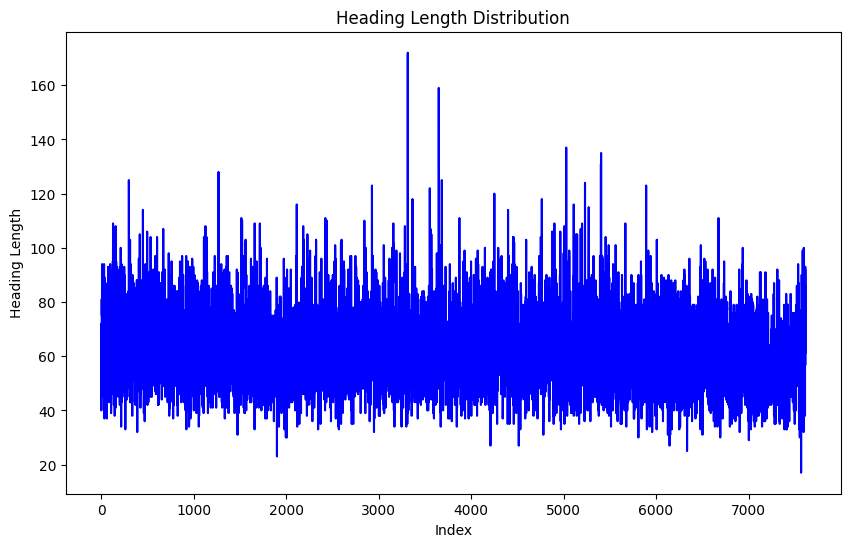

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['heading_len'], color='blue')
plt.xlabel('Index')
plt.ylabel('Heading Length')
plt.title('Heading Length Distribution')
plt.show()